In [1]:
from covid_health.prep_owid import parse_covid_tests
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

pd.options.display.max_rows = 6  # show less rows in preview

In [2]:
df = parse_covid_tests()
print(df.shape)
df.head()

(1261, 10)


,time,src,src_lb,notes,tot_n_tests,n_tests,tot_n_tests_pthab,n_tests_pthab,geo,unit
0,2020-03-22,https://www1.health.gov.au/internet/main/publi...,Australian Department of Health,NaN,143056.0,NaN,5.632530,NaN,Australia,units unclear
1,2020-03-29,https://www1.health.gov.au/internet/main/publi...,Australian Department of Health,They say 'Number of tests performed'. Unclear ...,211261.0,NaN,8.317959,NaN,Australia,units unclear
2,2020-04-02,https://www.covid19data.com.au/testing,Federal Department of Health,Most recent figure provided by Federal Departm...,261000.0,NaN,10.276328,NaN,Australia,units unclear
3,2020-04-03,https://www.covid19data.com.au/testing,Federal Department of Health,Most recent figure provided by Federal Departm...,277278.0,16278.0,10.917240,0.640912,Australia,units unclear
4,2020-04-06,https://www.covid19data.com.au/testing,Federal Department of Health,Most recent figure provided by Federal Departm...,302759.0,NaN,11.920501,NaN,Australia,units unclear


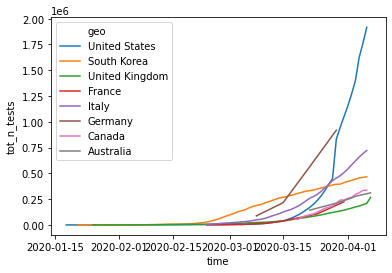

In [3]:
subset = df.loc[
    df.geo.isin(
        df.groupby("geo")
        .tot_n_tests.max()
        .nlargest(8)
        .index
    )
]

# BEWARE: e.g. for US there are multiple sources
subset = subset.groupby(["time", "geo"], as_index=False).mean()

sns.lineplot(data=subset, x="time", y="tot_n_tests", hue="geo")

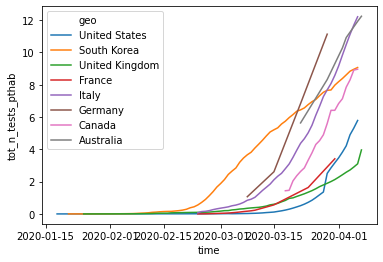

In [4]:
subset = df.loc[
    df.geo.isin(
        df.groupby("geo")
        .tot_n_tests.max()
        .nlargest(8)
        .index
    )
]

# BEWARE: e.g. for US there are multiple sources
subset = subset.groupby(["time", "geo"], as_index=False).mean()

sns.lineplot(data=subset, x="time", y="tot_n_tests_pthab", hue="geo")

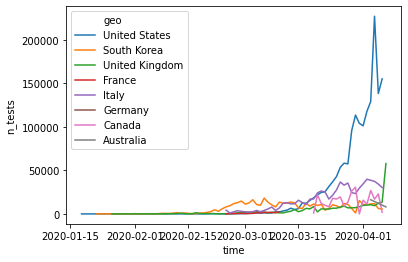

In [5]:
subset = df.loc[
    df.geo.isin(
        df.groupby("geo")
        .tot_n_tests.max()
        .nlargest(8)
        .index
    )
]

# BEWARE: e.g. for US there are multiple sources
subset = subset.groupby(["time", "geo"], as_index=False).mean()

sns.lineplot(data=subset, x="time", y="n_tests", hue="geo")